In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./data/Argentina_GDP_constant.csv')
data

,DATE,GDP(real)
0,1960,1.510000e+11
1,1961,1.590000e+11
2,1962,1.580000e+11
3,1963,1.490000e+11
4,1964,1.640000e+11
...,...,...
56,2016,5.820000e+11
57,2017,5.990000e+11
58,2018,5.830000e+11
59,2019,5.710000e+11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       61 non-null     int64  
 1   GDP(real)  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [8]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y')
data

,DATE,GDP(real)
0,1960-01-01,1.510000e+11
1,1961-01-01,1.590000e+11
2,1962-01-01,1.580000e+11
3,1963-01-01,1.490000e+11
4,1964-01-01,1.640000e+11
...,...,...
56,2016-01-01,5.820000e+11
57,2017-01-01,5.990000e+11
58,2018-01-01,5.830000e+11
59,2019-01-01,5.710000e+11


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       61 non-null     datetime64[ns]
 1   GDP(real)  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [10]:
data.index = data['DATE']
data.set_index('DATE', inplace=True)
data

,GDP(real)
DATE,
1960-01-01,1.510000e+11
1961-01-01,1.590000e+11
1962-01-01,1.580000e+11
1963-01-01,1.490000e+11
1964-01-01,1.640000e+11
...,...
2016-01-01,5.820000e+11
2017-01-01,5.990000e+11
2018-01-01,5.830000e+11


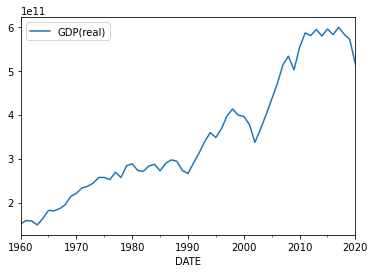

In [11]:
data.plot()
#plt.show()
plt.savefig('./GDP_real.png')

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

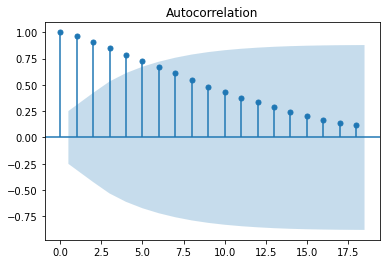

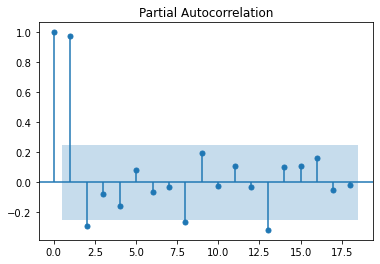

In [13]:
plot_acf(data)
plt.savefig('./GDPreal_diff0_acf.png')

plot_pacf(data)
plt.savefig('./GDPreal_diff0_pacf.png')
#plt.show()

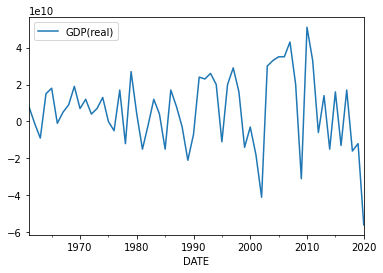

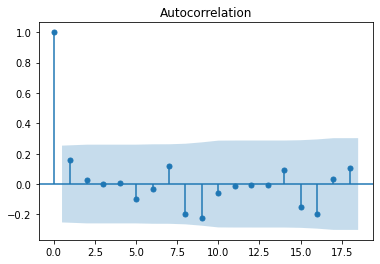

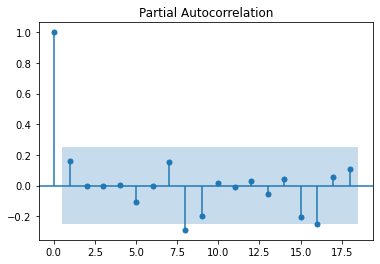

In [14]:
# 1차 차분
data_1 = data.diff(periods=1).iloc[1:]
data_1.plot()
plt.savefig('./GDPreal_diff1.png')

plot_acf(data_1)
plt.savefig('./GDPreal_diff1_acf.png')
plot_pacf(data_1)
plt.savefig('./GDPreal_diff1_pacf.png')
#plt.show()

In [24]:
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.GDP(real)   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1505.305
Method:                       css-mle   S.D. of innovations    18479040347.098
Date:                Thu, 09 Dec 2021   AIC                           3022.611
Time:                        11:35:29   BIC                           3035.177
Sample:                    01-01-1961   HQIC                          3027.526
                         - 01-01-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.067e+09   2.81e+09      2.158      0.031    5.58e+08    1.16e+10
ar.L1.D.GDP(real)     0.9441      0.096      9.853      0.000       0.756       1.132
ar.L2.D.GDP(real)    -0.

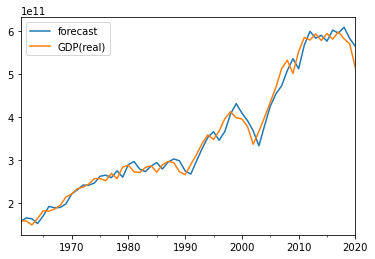

In [25]:
model_fit.plot_predict()
plt.savefig('./GDPreal_diff1_pred.png')

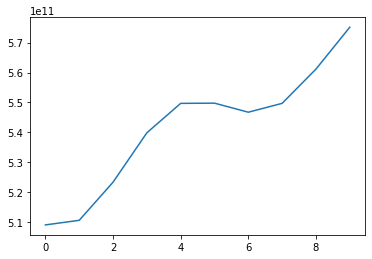

In [26]:
forecast = model_fit.forecast(steps=10)
pred_y = forecast[0].tolist()

plt.plot(pred_y)
plt.savefig('./GDPreal_10y_prd.png')

In [27]:
pred_y

[509089485803.7906,
 510630168211.01953,
 523370162585.6066,
 539873948816.1226,
 549695717367.145,
 549768766150.781,
 546744606028.6235,
 549706049868.9211,
 561149474043.6443,
 575130604630.486]